# Análise de E-commerce e Segmentação de Clientes (RFM) - CasaTech

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import datetime as dt

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
# Pede para você fazer upload dos TRÊS arquivos
print("Faça o upload dos 3 arquivos: 'clientes.csv', 'produtos.csv' e 'vendas.csv'")
uploaded = files.upload()

# Lê os arquivos
clientes_df = pd.read_csv(io.BytesIO(uploaded['clientes.csv']))
produtos_df = pd.read_csv(io.BytesIO(uploaded['produtos.csv']))
vendas_df = pd.read_csv(io.BytesIO(uploaded['vendas.csv']))

print("\nArquivos carregados com sucesso!")
display(clientes_df.head())
display(produtos_df.head())
display(vendas_df.head())

Faça o upload dos 3 arquivos: 'clientes.csv', 'produtos.csv' e 'vendas.csv'


Saving clientes.csv to clientes.csv
Saving produtos.csv to produtos.csv
Saving vendas.csv to vendas.csv

Arquivos carregados com sucesso!


,customer_id,nome,pais,data_cadastro
0,C-001,João Silva,Portugal,2024-01-10
1,C-002,Maria Garcia,Espanha,2024-01-15
2,C-003,Hans Müller,Alemanha,2024-02-01
3,C-004,Liam Byrne,Irlanda,2024-02-05
4,C-005,Ana Pereira,Portugal,2024-03-12


,product_id,nome_produto,categoria,preco_eur
0,P-101,"Smart TV 55""",Eletrônicos,450.0
1,P-102,Laptop Ultra Fino,Eletrônicos,800.0
2,P-103,Fone de Ouvido Bluetooth,Acessórios,60.0
3,P-104,Câmera DSLR,Eletrônicos,650.0
4,P-105,Cafeteira Expressa,Casa,120.0


,order_id,customer_id,product_id,quantity,order_date
0,O-1001,C-001,P-102,1,15/01/2024
1,O-1002,C-002,P-105,2,20/01/2024
2,O-1003,C-003,P-101,1,05/02/2024
3,O-1004,NaN,P-103,1,10/02/2024
4,O-1005,C-004,P-106,1,12/02/2024


# 2. Limpeza e Preparação dos Dados (Data Cleaning)

In [3]:
print("--- Informações Originais de Vendas ---")
vendas_df.info()

# 1. Tratando dados nulos (customer_id)
# Decisão de negócio: Não podemos analisar vendas sem cliente. Vamos removê-las.
vendas_limpo_df = vendas_df.dropna(subset=['customer_id'])
print(f"\nRegistros nulos em 'customer_id' removidos. Total de linhas: {len(vendas_limpo_df)}")

# 2. Convertendo datas (order_date)
# O formato é Dia/Mês/Ano (brasileiro/europeu)
vendas_limpo_df['order_date'] = pd.to_datetime(vendas_limpo_df['order_date'], format='%d/%m/%Y')

print("\n--- Informações Corrigidas de Vendas ---")
vendas_limpo_df.info()

--- Informações Originais de Vendas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     30 non-null     object
 1   customer_id  27 non-null     object
 2   product_id   30 non-null     object
 3   quantity     30 non-null     int64 
 4   order_date   30 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.3+ KB

Registros nulos em 'customer_id' removidos. Total de linhas: 27

--- Informações Corrigidas de Vendas ---
<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     27 non-null     object        
 1   customer_id  27 non-null     object        
 2   product_id   27 non-null     object        
 3   quantity     27 non-null     int64         
 4   order_date   27 no

/tmp/ipython-input-149978465.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_limpo_df['order_date'] = pd.to_datetime(vendas_limpo_df['order_date'], format='%d/%m/%Y')


# 3. Unindo (Merge) as Tabelas e Engenharia de Features

In [4]:
# 1. Unir Vendas com Produtos (para ter preço e categoria)
vendas_com_produtos_df = pd.merge(
    vendas_limpo_df,
    produtos_df,
    on='product_id',
    how='left'
)

# 2. Unir com Clientes (para ter país e nome)
df_completo = pd.merge(
    vendas_com_produtos_df,
    clientes_df,
    on='customer_id',
    how='left'
)

# 3. Engenharia de Features: Criar a coluna 'total_sale'
df_completo['total_sale'] = df_completo['quantity'] * df_completo['preco_eur']

print("Tabelas unidas e coluna 'total_sale' criada:")
display(df_completo.head())

Tabelas unidas e coluna 'total_sale' criada:


,order_id,customer_id,product_id,quantity,order_date,nome_produto,categoria,preco_eur,nome,pais,data_cadastro,total_sale
0,O-1001,C-001,P-102,1,2024-01-15,Laptop Ultra Fino,Eletrônicos,800.0,João Silva,Portugal,2024-01-10,800.0
1,O-1002,C-002,P-105,2,2024-01-20,Cafeteira Expressa,Casa,120.0,Maria Garcia,Espanha,2024-01-15,240.0
2,O-1003,C-003,P-101,1,2024-02-05,"Smart TV 55""",Eletrônicos,450.0,Hans Müller,Alemanha,2024-02-01,450.0
3,O-1005,C-004,P-106,1,2024-02-12,Robô Aspirador,Casa,220.0,Liam Byrne,Irlanda,2024-02-05,220.0
4,O-1006,C-001,P-103,3,2024-02-20,Fone de Ouvido Bluetooth,Acessórios,60.0,João Silva,Portugal,2024-01-10,180.0


# 4. Análise Exploratória e Visualização (O NOVO PASSO!)

/tmp/ipython-input-2578954608.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_categoria.index, y=faturamento_categoria.values, palette='viridis')


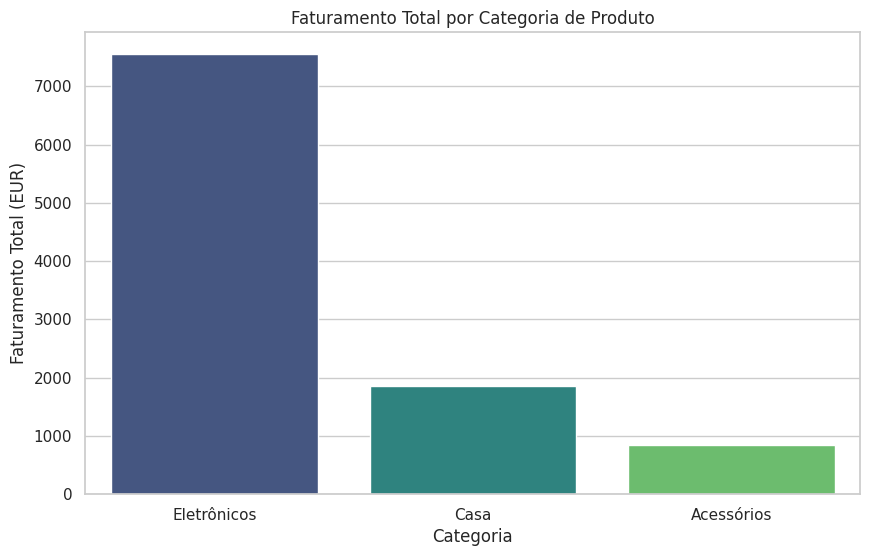

/tmp/ipython-input-2578954608.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_pais.index, y=faturamento_pais.values, palette='Blues_d')


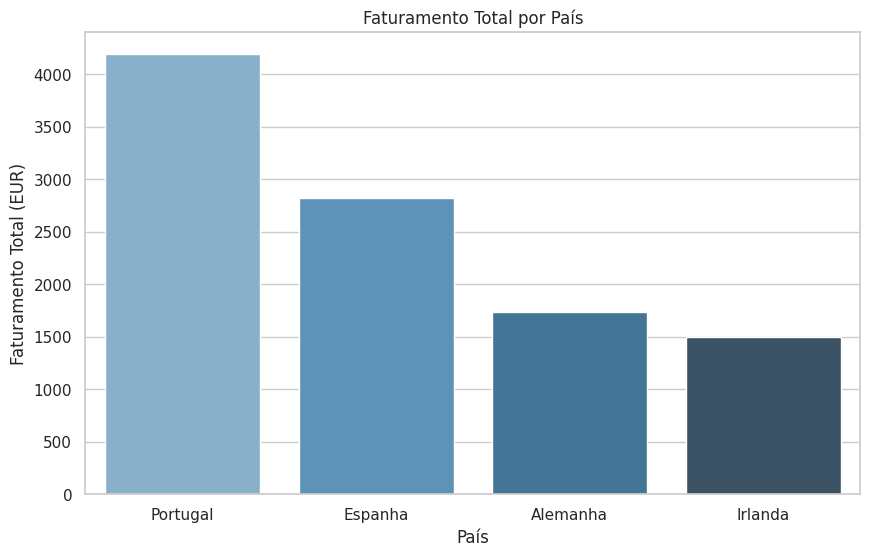

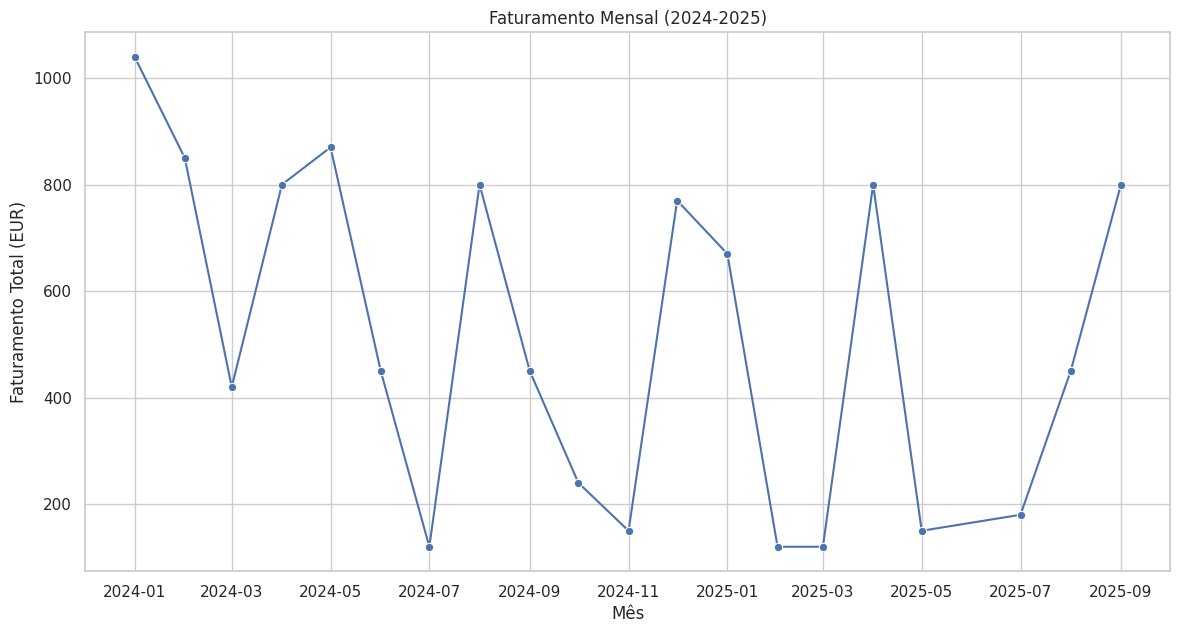

In [5]:
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico 1: Faturamento total por Categoria
plt.figure(figsize=(10, 6))
faturamento_categoria = df_completo.groupby('categoria')['total_sale'].sum().sort_values(ascending=False)
sns.barplot(x=faturamento_categoria.index, y=faturamento_categoria.values, palette='viridis')
plt.title('Faturamento Total por Categoria de Produto')
plt.ylabel('Faturamento Total (EUR)')
plt.xlabel('Categoria')
plt.show()

# Gráfico 2: Faturamento total por País
plt.figure(figsize=(10, 6))
faturamento_pais = df_completo.groupby('pais')['total_sale'].sum().sort_values(ascending=False)
sns.barplot(x=faturamento_pais.index, y=faturamento_pais.values, palette='Blues_d')
plt.title('Faturamento Total por País')
plt.ylabel('Faturamento Total (EUR)')
plt.xlabel('País')
plt.show()

# Gráfico 3: Faturamento ao longo do tempo (Line Plot)
# Agrupando por mês
df_completo['mes_ano'] = df_completo['order_date'].dt.to_period('M')
vendas_no_tempo = df_completo.groupby('mes_ano')['total_sale'].sum().reset_index()
vendas_no_tempo['mes_ano'] = vendas_no_tempo['mes_ano'].dt.to_timestamp() # Converte para data para o gráfico

plt.figure(figsize=(14, 7))
sns.lineplot(data=vendas_no_tempo, x='mes_ano', y='total_sale', marker='o')
plt.title('Faturamento Mensal (2024-2025)')
plt.ylabel('Faturamento Total (EUR)')
plt.xlabel('Mês')
plt.show()

# 5. Análise de Segmentação (RFM - Recência, Frequência, Valor Monetário)

In [6]:
# Para calcular a Recência, precisamos de uma "data de hoje" (snapshot)
# Vamos usar 1 dia após a última compra no dataset
data_snapshot = df_completo['order_date'].max() + dt.timedelta(days=1)
print(f"Data do Snapshot para análise: {data_snapshot.date()}")

# Agrupando os dados por cliente para calcular R, F, M
rfm_df = df_completo.groupby('customer_id').agg(
    Recencia=('order_date', lambda x: (data_snapshot - x.max()).days), # Dias desde a última compra
    Frequencia=('order_id', 'count'),                                  # Contagem total de pedidos
    Valor_Monetario=('total_sale', 'sum')                              # Soma total gasta
).reset_index()

print("\nTabela RFM calculada:")
display(rfm_df.head())

Data do Snapshot para análise: 2025-09-26

Tabela RFM calculada:


,customer_id,Recencia,Frequencia,Valor_Monetario
0,C-001,129,6,3030.0
1,C-002,37,5,1950.0
2,C-003,1,5,1740.0
3,C-004,73,4,1500.0
4,C-005,164,4,1160.0


In [7]:
# Vamos criar "pontuações" de 1 a 4 para R, F e M
# qcut() divide os dados em quantis (grupos de tamanho igual)
# Para Recência, quanto MENOR o número, melhor (mais recente).
rfm_df['R_Score'] = pd.qcut(rfm_df['Recencia'], 4, labels=[4, 3, 2, 1])
# Para Frequência e Valor, quanto MAIOR o número, melhor.
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequencia'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm_df['M_Score'] = pd.qcut(rfm_df['Valor_Monetario'].rank(method='first'), 4, labels=[1, 2, 3, 4])

# Combinando as pontuações
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

print("\nTabela RFM com Pontuações:")
display(rfm_df.sort_values(by='RFM_Score', ascending=False).head())


Tabela RFM com Pontuações:


,customer_id,Recencia,Frequencia,Valor_Monetario,R_Score,F_Score,M_Score,RFM_Score
2,C-003,1,5,1740.0,4,4,3,443
1,C-002,37,5,1950.0,4,3,4,434
3,C-004,73,4,1500.0,3,1,2,312
0,C-001,129,6,3030.0,2,4,4,244
4,C-005,164,4,1160.0,1,2,1,121


In [8]:
# Definindo os segmentos com base nas pontuações (Exemplo)
# Dicionário de segmentos (baseado nas pontuações F e M)
# (Isso é uma simplificação, mas muito usada)
segment_map = {
    r'[3-4][3-4]': '1. Clientes Campeões',  # Pontuação F e M altas
    r'[3-4][1-2]': '2. Clientes Leais',      # Pontuação F alta, M baixa
    r'[1-2][3-4]': '3. Clientes com Potencial', # Pontuação F baixa, M alta
    r'[1-2][1-2]': '4. Clientes em Risco'     # Pontuação F e M baixas
}

# Aplicando a segmentação
rfm_df['Segmento'] = (rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)).replace(segment_map, regex=True)
# Corrigindo clientes com baixa recência (que não compram há muito tempo)
rfm_df.loc[rfm_df['R_Score'].isin([1, 2]), 'Segmento'] = '5. Clientes Perdidos (Hibernando)'

print("\nSegmentação Final dos Clientes:")
display(rfm_df[['customer_id', 'Segmento', 'RFM_Score', 'Recencia', 'Frequencia', 'Valor_Monetario']].head())


Segmentação Final dos Clientes:


,customer_id,Segmento,RFM_Score,Recencia,Frequencia,Valor_Monetario
0,C-001,5. Clientes Perdidos (Hibernando),244,129,6,3030.0
1,C-002,1. Clientes Campeões,434,37,5,1950.0
2,C-003,1. Clientes Campeões,443,1,5,1740.0
3,C-004,4. Clientes em Risco,312,73,4,1500.0
4,C-005,5. Clientes Perdidos (Hibernando),121,164,4,1160.0


# 6. Recomendações de Negócio

/tmp/ipython-input-1290017273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segmento_contagem.index, y=segmento_contagem.values, palette='rocket')


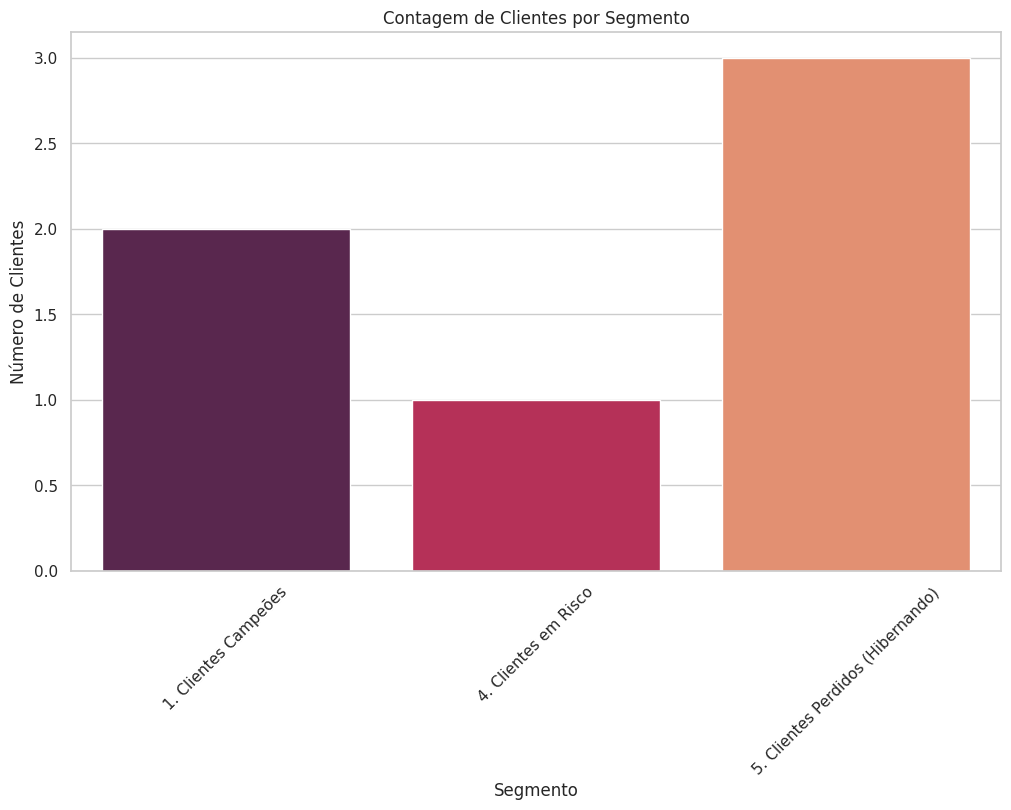

In [9]:
# Vamos visualizar o tamanho de cada segmento
plt.figure(figsize=(12, 7))
segmento_contagem = rfm_df['Segmento'].value_counts().sort_index()
sns.barplot(x=segmento_contagem.index, y=segmento_contagem.values, palette='rocket')
plt.title('Contagem de Clientes por Segmento')
plt.ylabel('Número de Clientes')
plt.xlabel('Segmento')
plt.xticks(rotation=45)
plt.show()

* **Ação:** Programas VIP, acesso antecipado a produtos, agradecimento especial. São nossos melhores clientes, precisam ser mimados.

* **Ação:** Oferecer pacotes (cross-sell) ou "compre X e ganhe Y". Tentar aumentar o valor médio (ticket) deles.

* **Ação:** Oferecer clube de assinatura ou frete grátis para incentivar a frequência.

* **Ação:** Campanhas de e-mail marketing genéricas com as promoções mais fortes.

* **Ação:** Campanha de reativação agressiva com um cupom de desconto de "sentimos sua falta" (ex: "20% OFF no seu próximo pedido").